In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('rose-pine-moon')
%matplotlib inline

## Testing for normality

### Need of Testing of Normality

Majority of hypothesis testing methods require the data to be normally distributed.

There are various ways of testing normality of data:
1. **Classical Diagonostics**: Skewness (standardized third moment) and Kurtosis (standradized fourth moment).
2. **Analytical Methods**: They use hypothesis testing with:
<br>$H_0$: *data is normally distributed*
<br>$H_a$: *data is not normally distributed*
<br><br>Some of the methods: Kolmogorov-Smirnov test,

3. **Graphical Methods**: They include visualising data to test normality. 
<br><br>Some of the methods: Histogram, QQ-plot.

Analytical Methods have issue of being dependent on sample size. P-value tends to decrease with increase in sample size. So if for small sample size data is barely distributed normally, for population this might not hold true.

### Classical Diagonstics

#### Skewness

##### Intuition

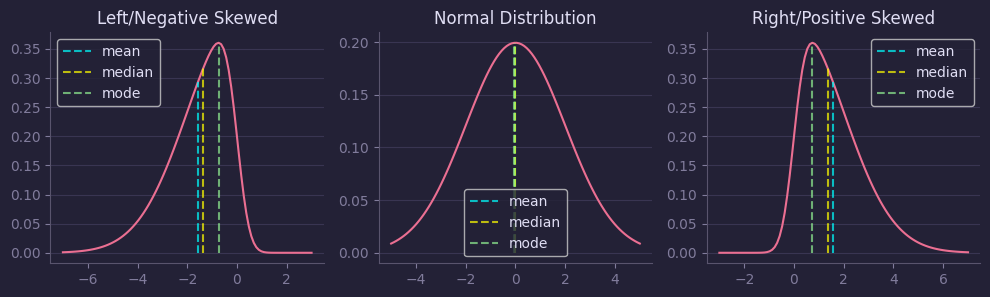

In [2]:
a = [-5, 0, 5] # skewness
loc = 0 # mean
scale = 2 # variance


fig = plt.figure(figsize=(12,3))
for i in range(3):
    ax = fig.add_subplot(1,3,i+1)
    skewnorm = sc.stats.skewnorm(a[i], loc, scale)

    if i == 0:
        x = np.linspace(-7, 3, 100)
        y = skewnorm.pdf(x)
        ax.set_title('Left/Negative Skewed')
    elif i == 1:
        x = np.linspace(-5, 5, 100)
        y = skewnorm.pdf(x)
        ax.set_title('Normal Distribution')
    elif i == 2:
        x = np.linspace(-3, 7, 100)
        y = skewnorm.pdf(x)
        ax.set_title('Right/Positive Skewed')
    ax.plot(x, y)
        
    
    mean = skewnorm.mean()
    median = skewnorm.median()
    # mean
    ax.plot([mean]*2, [0, skewnorm.pdf(mean)], color='cyan', ls='--', alpha=0.7, label='mean')
    # Median
    ax.plot([median]*2, [0, skewnorm.pdf(median)], color='yellow', ls='--', alpha=0.7, label='median')
    # Mode
    ax.plot([x[np.argmax(y)]]*2, [0, np.max(y)],color='lightgreen', ls='--', alpha=0.7, label='mode')
    ax.legend()

- **Left/Negative Skeweness**: Mean < Median < Mode.
- **Normal Distribution (Zero Skewness)**: Mean = Median = Mode.
- **Right/Positive Skewness**: Mean > Median > Mode.

Increasing Skewness factor would increase the seperation between mean, median and mode. So statistician Karl Pearson came up with a measure to measure the seperation of mean, median and mode.
1. Mode Skewness<br><br>
$\displaystyle \text{Skewness} = \frac{\text{mean - mode}}{\text{standard deviation}}$
<br><br>But for small data sizes, the mode cannot be calculated accurately.

2. Median Skewness: For skewed data $\text{mode} \approx 3(\text{median}) - 2(\text{mean})$. Substituting in above formula we get:<br><br>
$\displaystyle \text{Skewness} = \frac{3(\text{mean - median})}{\text{standard deviation}}$

In case the distributions are multimodal (with multiple peaks), the above formula do not give correct measure of skewness. In next section we see the modern definition of skewness.

##### Method of Moments and Skew

We can write first, second and third moment as follows:

$\displaystyle 
M_1 = \frac{\sum x}{n} \qquad
M_2 = \frac{\sum x^2}{n} \qquad
M_3 = \frac{\sum x^3}{n} 
$

Now we try to remove the components of previous moments in the later moments in order to remove the information we already know from the earlier moments. 
- We can remove first moment from second moment to get the *centralised second moment*. 
- We can remove first and second moment from third moment to get the *standardized third moment* which also referred to as *skew*.

So new definitions of moments are:

$\displaystyle 
\mu = \frac{\sum x}{n} \qquad
\sigma = \frac{\sum (x-\mu)^2}{n} \qquad
\text{skewness} = \frac{\sum (x-\mu)^3}{n\sigma^3} 
$

Since these are the population statistics, we have to consider the effects of degrees of freedom for samples.
So the above formula are modified as follows:

$\displaystyle 
\bar x = \frac{\sum x}{n} \qquad
s^2 = \frac{\sum (x-\bar x)^2}{n-1} \qquad
\text{skewness} = \frac{n}{(n-1)(n-2)}\frac{\sum (x-\mu)^3}{s^3} 
$


##### Different Skewness Values

Depending on skewness value we can come to rough conclusions:
- If skewness $\in [-0.5, 0.5]$, distribution is *approximately symmetric*.
- If skewness $\in [-1,0.5)\cap(0.5, 1]$, distribution is *moderately skewed*.
- If skewness $\in [-\infty, -1)\cap(1, \infty]$, distribution is *highly skewed*.

#### Kurtosis

##### Intuition

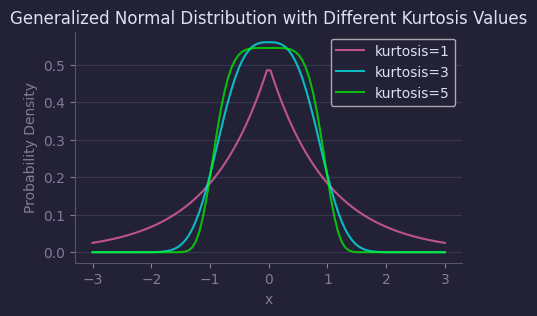

In [3]:
beta = [1,3,5]  # kurtosis values

x = np.linspace(-3, 3, 100)

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1,1,1)
colors = ['hotpink', 'cyan', 'lime']
for i in range(3):
    pdf = sc.stats.gennorm.pdf(x, beta=beta[i])
    ax.plot(x, pdf, alpha=0.7, color=colors[i], label = f'kurtosis={beta[i]}')
    
ax.set_title('Generalized Normal Distribution with Different Kurtosis Values')
ax.set_xlabel('x')
ax.set_ylabel('Probability Density')
ax.legend();  

Without knowing much about this measure "kurtosis" we can intuitively observe that:
- It is related to fatness/flatness of tail. 
- Lower kurtosis corresponds to a distribution with lighter tail.
- Higher Kurtosis corresponds to a distribution with flatter tails.
- A normal distribution has a kurtosis of 3.

Note that above distributions have same mean, variance and skewness and therefore *kurtosis* helps us differentiate in above distributions.

Also, it can also  be observed that if tails density change, the peakedness also change and was used to define kurtosis. But this has been proven to be wrong.

##### Kurtosis and Moments

Similar to previous section of skewness, we calculate the fourth standardised moment as follows:

$\displaystyle \text{kurtosis} = \frac{1}{n}\left( \frac{\sum(x-\mu)^4}{\sigma^4}\right)$

After applying the degree of freedom adjustment to formula for samples:

$\displaystyle \text{kurtosis} = \frac{n(n+1)}{(n-1)(n-2)(n-3)}\left(\frac{\sum(x - \bar x)^4}{s^4} \right) - \frac{3(n-1)^2}{(n-2)(n-3)}$

#### Types of Kurtosis

Kurtosis ranges from 1 to infinity. There are three type of kurtosis:
1. **Leptokurtic**: Kurtosis > 3, heavier tails. Example: T-distribution.
2. **Mesokurtic**: Kurtosis = 3, Normal Curve.
3. **Platykurtic**: Kurtosis < 3, lighter tails. Example: Uniform distribution.

Excess (adjusted) kurtosis = $\text{kurtosis} - 3,\; \in [-2, \infty)$ 

Consider the kurtosis formuala for the population:

$\displaystyle \text{kurtosis} = \frac{1}{n}\left( \frac{\sum(x-\mu)^4}{\sigma^4}\right) = 
\frac{1}{n}\left( \frac{\sum(x-\mu)^4}{(\sum (x-\mu)^2/n)^2}\right)
$

Now consider the following:
- The points near the mean (within one standard deviation) do not contribute much in numerator as well as denominator.
- That is **the points near peak do not contribute much to kurtosis**.
- The points away from the mean contribute the both numerator and denominator. But denoimantor (sum of second powers) is not able cancel the effect of numerator (sum of fourth powers).
- That is **the points in tails contribute to the kurtosis**.

Even though in most cases a distribution with different kurtosis will have different peaks, but it makes more sense to use density of tails as an anyalytical measure of kurtosis.

#### Kurtosis and Peakedness

Consider the kurtosis formuala for the population:

$\displaystyle \text{kurtosis} = \frac{1}{n}\left( \frac{\sum(x-\mu)^4}{\sigma^4}\right) = 
\frac{1}{n}\left( \frac{\sum(x-\mu)^4}{(\sum (x-\mu)^2/n)^2}\right)
$

Now consider the following:
- The points near the mean (within one standard deviation) do not contribute much in numerator as well as denominator.
- That is **the points near peak do not contribute much to kurtosis**.
- The points away from the mean contribute the both numerator and denominator. But denoimantor (sum of second powers) is not able cancel the effect of numerator (sum of fourth powers).
- That is **the points in tails contribute to the kurtosis**.

Even though in most cases a distribution with different kurtosis will have different peaks, but it makes more sense to use density of tails as an anyalytical measure of kurtosis.

### Analytical Tests

#### Kolmogorov-Smrinov Test

- **Purpose**: To find the difference in the distribution of the sample data and theoretical distribution.

- A comparision is made between the theoretical cumulative distribution function $(F_T(x))$ and a sample CDF $(F_S(x))$.

- This difference is measured by statistic *D*, which is the greatest vertical distance between $F_S(x)$ and $F_T(x)$.<br><br>
$D = \text{max} [ | F_S(x) - F_T(x)| ]$

- **Empirical Distribution function**: Given an observed random sample $X_1, X_2, \dots, X_n$, the *empirical distribution function* $S(x)$ is the fraction of $X_i$s that are less than or equal to *x*,  $\forall x \in (-\infty, \infty)$. <br><br>
$\displaystyle S(x) = \frac{1}{n}\sum_{i=1}^n I_{(x_i<x)}$

- More specifically, if $y_1 <y_2<\dots<y_n$ are the order statistic of observed random sample, with no two observations being equal.

- The empirical distribution function is defined as:<br><br>
$F_T(x) = \begin{cases}
0 & \text{for} \; x<y_1 \\
\frac{k}{n} & \text{for}\; y_k\leq x\leq y_{k+1} ,\;k=1,2,\dots, n-1\\
1 & \text{for} \; x\geq y_n \\
\end{cases}$

In [4]:
data = np.array([108, 112, 117, 130, 111, 131, 113, 113, 105, 128]) 
data = np.sort(data)
z_scores = (data-np.mean(data))/np.std(data)

def empirical_distribution_function(data):
    temp = []
    for i in data:
        temp.append(np.sum(data <= i) / len(data))
    return np.array(temp)

edf_values = empirical_distribution_function(z_scores)
reference_cdf = sc.stats.norm.cdf(z_scores)

D_mannual = np.max(np.abs(edf_values-reference_cdf))

D, p_value = sc.stats.kstest(z_scores, 'norm')
print(
    f'D-Statistic: {D:.4f}',
    f'\nD-statistic (mannual): {D_mannual:.4g}'
    f'\nP-value:{p_value:.4f}'
)

D-Statistic: 0.2642 
D-statistic (mannual): 0.2642
P-value:0.4155


For significance level of 0.1 we cannot reject null hypothesis and we can claim that data maybe distributed normally.

#### Shapiro-Wilk Test

The Shapiro–Wilk test tests the null hypothesis that a sample $x_1, \dots, x_n$ came from a normally distributed population. The test statistic is 

$\displaystyle W = \frac{(\sum_{i=1}^n a_i x_{(i)})^2}{\sum_{i=1}^n(x_i - \bar x)^2}$

where $x_{(i)}$ is the ith order statistic, i.e. the ith-samllest number in the sample.<br>
The coefficents $a_i$ are given by:

$(a_1,\dots,a_n) = \frac{m^TV^{-1}}{C}$

where C is a vector norm: $C = \lVert V^{-1}m\rVert$ and vector *m* is made of the expected values of the order statistics of independent and identically distributed random variables sampled from the standard normal distribution; finally, V {\displaystyle V} is the covariance matrix of those normal order statistics.

Intuitvely the denominator is sum of squares or unscaled variance and the numerator tries to approximate using other statistics. Therefore
- *W* is always less than 1.
- *W* values closer to one ensures normality.
- The cutoff values of *W* are calculated through Monte Carlo simulations.

In [5]:
data = np.array([108, 112, 117, 130, 111, 131, 113, 113, 105, 128]) 
data = np.sort(data)

W_statistics, p_value = sc.stats.shapiro(data)
print(
    f'W_statistic: {W_statistics}',
    f'\nP-value: {p_value}'
)

W_statistic: 0.8680732929009972 
P-value: 0.0949211804963732


For significance level of 0.1 we can reject null hypothesis using Shapiro-Wilk Test and claim data is not normally distributed.

### Graphichal Methods

#### Qunatile-Quantile Plot

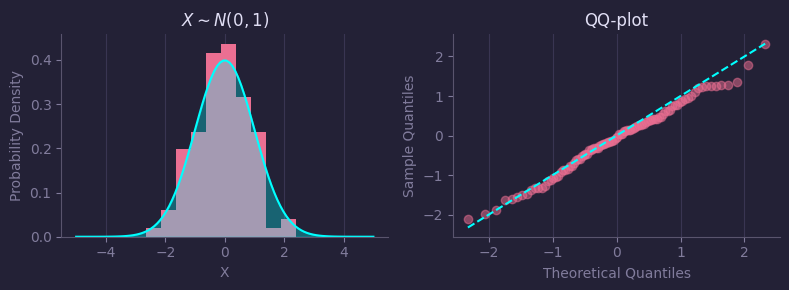

In [6]:
data = np.random.normal(0,1,(100,))
norm = sc.stats.norm(0, 1)
t = np.linspace(-5, 5, 100)

# 1. Arranging Data in ascending order
sorted_data = np.sort(data)

# 2. Calculating theoretical quantiles
theoretical_quantiles = norm.ppf(np.linspace(0,1,len(data)))

# 3. Calculating sample quantiles
sample_quantiles = np.percentile(data, np.linspace(0, 100, len(data)))

# 4. PLotting theoretical quantile vs Sample quantiles
fig = plt.figure(figsize=(8,3), tight_layout=True)

for i in range(2):
    ax = fig.add_subplot(1,2,i+1)
    if i == 0:
        ax.hist(sample_quantiles, density=True)
        ax.plot(t,norm.pdf(t), color='cyan')
        ax.fill_between(t, norm.pdf(t), alpha=0.3,color='cyan')
        ax.set_xlabel('X')
        ax.set_ylabel('Probability Density')
        ax.set_title(r'$X\sim N(0,1)$')
    elif i == 1:
        ax.plot(theoretical_quantiles, theoretical_quantiles, color='cyan', ls='--')
        ax.scatter(theoretical_quantiles, sample_quantiles, alpha=0.5)
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Sample Quantiles')
        ax.set_title('QQ-plot')
    ax.grid()

Properties:
- Slope of QQ plot is equal to standard deviation of samples.
- Intercept of QQ plot is equal to mean of samples.

#### Probability Plots

Steps:
1. Arange Data in ascending order.
2. Find Theoretical Percentiles using inverse cumulative distribution (ppf) function.
3. Scale sorted data and theoretical percentiles to 0-1 range.
4. Plot theoretical percentile vs sorted sample data.

Note: Difference in QQ-plot and probability is of 0-1 scaling

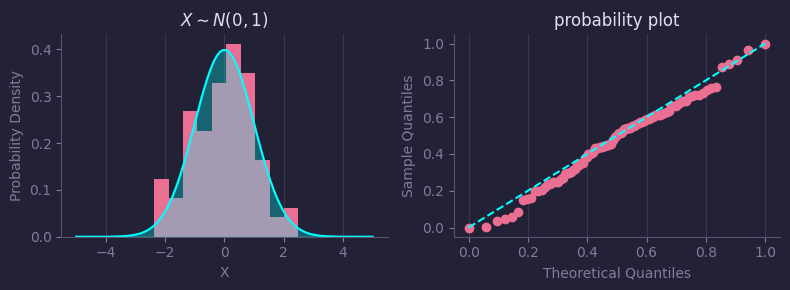

In [7]:
data = np.random.normal(0,1,(100,))

# sorted data / empirical quantiles
sorted_data = np.sort(data)

# Ro calculate theoretical quantiles ensure that limits are not 0 and 1 or else the correspondig ppf will give -inf and inf which will cause scaling issue
p = sc.stats.norm.ppf(np.linspace(0.01, 0.99, 100))

# scaler
scaler = lambda x, new_min, new_max: (x-np.min(x))/(np.max(x) - np.min(x)) * (new_max-new_min) + new_min

# scaled values
p = scaler(p, 0, 1)
sorted_data = scaler(sorted_data, 0, 1)

fig = plt.figure(figsize=(8,3), tight_layout=True)
for i in range(2):
    ax = fig.add_subplot(1,2,i+1)
    if i == 0:
        ax.hist(data, density=True)
        ax.plot(t,norm.pdf(t), color='cyan')
        ax.fill_between(t, norm.pdf(t), alpha=0.3,color='cyan')
        ax.set_title(r'$X \sim N(0,1)$')
        ax.set_xlabel('X')
        ax.set_ylabel('Probability Density')
    else:
        ax.scatter(p, sorted_data)
        ax.plot(p, p, color='cyan', ls='--')
        ax.set_title('probability plot')
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Sample Quantiles')
    ax.grid();